# Physics of Stars Computer Project

### Anna Esselink (s4149653)
### Maria Dziouba (s3950425)

In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>")) #Uncomment these lines for fullscreen mode :)

import numpy as np
from matplotlib.pyplot import figure, show, ylim, xscale, vlines
from scipy.interpolate import interp2d
from scipy.integrate import solve_ivp
import seaborn as sns
#Import other prerequisites here

## Abstract

In this project...

## Part 1 - Reading & Interpolating Data

This part uses tables from the Opacity Project. Read the file **opacity_tables.tab**, which will explain what each table is for. You will see files named **table_xx_edited.txt** on Nestor. These are the necessary tables for this section (with **xx** corresponding to that table number in the opacity_tables file. The headers in these subfiles are removed for convenience. Note that you do not have all the data you need from just these files, and you may need to make some approximations with the data you are given. 

In [16]:
# Loading in data for necessary tables
# This is an "idiot-proof" way of doing it, feel free to do it in a nicer way  - original file is opacity_tables.tab
# Info on the tables also in opacity_tables.tab, so read that

# Tables loaded
opacity_OP_07_002 = np.loadtxt("table_73_edited.txt") 
opacity_OP_07_004 = np.loadtxt("table_75_edited.txt") 
opacity_OP_07_006 = np.loadtxt("table_76_edited.txt") 
opacity_OP_1 = np.loadtxt("table_115_edited.txt")

opacity_OP_07_002 = np.array(opacity_OP_07_002)

# Headers for interpolating (x-axis in table is logR, y-axis is logT)
logT_OP = np.array([3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6, 4.65, 4.7, 4.75, 4.8, 4.85, 4.9, 4.95, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0])
logR_OP = np.array([-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0])

In [17]:
# Interpolating data
# the way the tables are set up now, it works well with scipy.interpolate. 
# Write a very general interpolater to make it easier later.
sns.set_palette(sns.color_palette("hls", 4))

#f_xyz, where xyz are the composition parameters
f_1 = interp2d(logR_OP, logT_OP, opacity_OP_1) 
f_002 = interp2d(logR_OP, logT_OP, opacity_OP_07_002)
f_004 = interp2d(logR_OP, logT_OP, opacity_OP_07_004)
f_006 = interp2d(logR_OP, logT_OP, opacity_OP_07_006)

#data to reproduce fig 3.17
logT_plot = np.linspace(np.min(logT_OP), np.max(logT_OP), 1000)
logR_plot = -3

opacity_plot_1 = f_1(logR_plot, logT_plot)
opacity_plot_002 = f_002(logR_plot, logT_plot)
opacity_plot_004 = f_004(logR_plot, logT_plot)
opacity_plot_006 = f_006(logR_plot, logT_plot)

# the opacity for Z=0.05 can be approximated by taking the mean of the interpolated
# functions of Z=0.04 and Z=0.06
opacity_plot_005 = np.mean([opacity_plot_004, opacity_plot_006], axis=0)

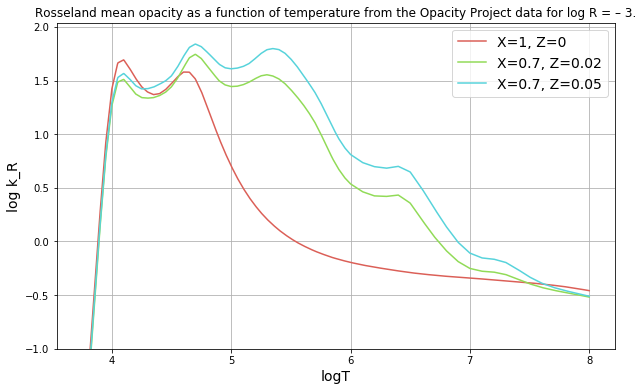

In [18]:
# Plotting data - Plot of κR vs log T

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('logT', fontsize="14")
fr.set_ylabel('log k_R', fontsize="14")
fr.grid(True)
fr.plot(logT_plot, opacity_plot_1,"-", label = "X=1, Z=0")
fr.plot(logT_plot, opacity_plot_002,"-", label = "X=0.7, Z=0.02")
fr.plot(logT_plot, opacity_plot_005,"-", label = "X=0.7, Z=0.05")
#fr.plot(logT_plot, opacity_plot_006,"-", label = "X=0.7, Z=0.06")
fr.set_title("Rosseland mean opacity as a function of temperature from the Opacity Project data for log R = – 3.")
fr.legend(fontsize="14")
ylim(bottom=-1)
show()

### Extension to T, P

To be able to determine the opacity for the pressure we need a function for R in terms of P and T. For this we used equations 3.78 and 5.107. The density can be written as $\rho=R \cdot T_6^3=R\cdot10^{-18}T^3$. Substituting this into equation 5.107 gives us $P = \frac{\rho k T}{\mu m_H}= \frac{kRT^410^{-18}}{\mu m_H}$. For $\mu$, the mean molecular weight, we took a value of 1.3$m_H$, as this the approximate mean molecular weight for the Sun. This can also be calculated using equation 5.127 and the literary values for the mass fraction of the Sun, using the assumption that all atoms are neutral.  
The function below uses a given log P and log T to calculate the log R, which is then used in the previously interpolated function. The return function can be any of the interpolated functions, but below we used a combined version of a low and high temperature range as this is usefull later on.

In [19]:
def Log_opacity(logP, logT):
    """ Return the log of opacity for a given logP and logR"""
    k = 1.380658e-16  #erg/K Boltzmann constant
    mu = 1.3 #average mass in m_H
    mH = 1.6735344e-24   #g, mass of 1H atom
    logR = -np.log10(k/(mu*mH)) + logP - 4*logT + 18
    return f_opacity(logR, logT)   #opacity new defined in next question

### Extending the Interpolator

The Grevesse and Noels tables are opacity values for the same logR but for a lower tempeature range, 2.75 to 4.5 instead of 3.75 to 8. This data set can be interpolated in the exact same way as the Opacity Project tables.  
In the following section these two sets will be combined using the following linear combination:  
$k(logT)=c_1(logT)\cdot f_{OP}+c_2(logT) \cdot f_{GN}$  
$c_1(logT)=0$ for $logT<3.75$  
$c_2(logT)=1$ for $logT<3.75$  
$c_1(logT)=1$ for $4.5<logT$  
$c_2(logT)=0$ for $4.5<logT$  
In the overlapping regions $c_1$ linearly increases with logT and $c_2$ linearly decreases with logT. This leads to the following equations:  
$c_1=\frac{logT-3.75}{4.5-3.75}$ for $3.75<logT<4.5$  
$c_1=\frac{4.5-logT}{4.5-3.75}$ for $3.75<logT<4.5$  
This leads to that in the low range (2.75 to 3.75) the Grevesse and Noels tables are used, in the high range (4.5 to 8) the Opacity Project tables are used, while in the overlapping region the linear combination is used. This new data set can then be interpolated to create a new function that works for the whole range of logT.

In [20]:
# Load new table, if you want to do this more elegantly the raw table is g7_02.tron
opacity_GN = np.loadtxt("g7_02_edited.tron")
opacity_GN = np.array(opacity_GN)

# Headers for this table
logT_GN = np.array([4.5, 4.45, 4.4, 4.35, 4.3, 4.25, 4.2, 4.15, 4.1, 4.05, 4.0, 3.95, 3.9, 3.85, 3.8, 3.75, 3.7, 3.65, 3.6, 3.55, 3.5, 3.49, 3.48, 3.47, 3.46, 3.45, 3.44, 3.43, 3.42, 3.41, 3.4, 3.39, 3.38, 3.37, 3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3, 3.29, 3.28, 3.27, 3.26, 3.25, 3.24, 3.23, 3.22, 3.21, 3.2, 3.19, 3.18, 3.17, 3.16, 3.15, 3.14, 3.13, 3.12, 3.11, 3.1, 3.09, 3.08, 3.07, 3.06, 3.05, 3.04, 3.03, 3.02, 3.01, 3.0, 2.99, 2.98, 2.97, 2.96, 2.95, 2.94, 2.93, 2.92, 2.91, 2.9, 2.85, 2.8, 2.75, 2.7])
logR_GN = np.array([-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0])

#interpolate Grevesse and Noels tables
f_702_GN = interp2d(logR_GN, logT_GN, opacity_GN)

#a = np.where(3.75 == logT_GN)
#opacity_Tlow = opacity_GN[a[0][0]:,:]

#b = np.where(4.5 == logT_OP)
#opacity_Thigh = opacity_OP_07_002[b[0][0]:,:]

#array of all logT's from low to high range
logT_new = np.array([2.7,  2.75, 2.8,  2.85, 2.9,  2.95, 3.,   3.05, 3.1,  3.15, 3.2,  3.25, 3.3,  3.35,
 3.4,  3.45, 3.5,  3.55, 3.6,  3.65, 3.7,  3.75, 3.8,  3.85, 3.9,  3.95, 4.,   4.05,
 4.1,  4.15, 4.2,  4.25, 4.3,  4.35, 4.4,  4.45, 4.5,  4.55, 4.6,  4.65, 4.7,  4.75,
 4.8,  4.85, 4.9,  4.95, 5.,   5.05, 5.1,  5.15, 5.2,  5.25, 5.3,  5.35, 5.4,  5.45,
 5.5,  5.55, 5.6,  5.65, 5.7,  5.75, 5.8,  5.85, 5.9,  5.95, 6., 6.1,
 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7., 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.])
#crazyyy bugs in python, so we had to do it this way instead of using
# logT_new = np.arange(2.70, 8.05, step = 0.05)
# logT_new = np.linspace(2.70, 8.05, 108)

# for 2.7<logT<3.75 --> lower T range
# for 3.75<logT<4.5 --> linear combination of low and high
# for 4.5<logT> 8.0 --> high T range

#create array of right amount of collumns to submit rows to
opacity_new = np.zeros(len(logR_OP))

for logT in logT_new:
    #row = list(logT_new).index(logT)
    if logT<= 3.75:  #low range
        row_low = list(logT_GN).index(logT)
        opacity_new = np.vstack((opacity_new, opacity_GN[row_low,:]))
    if logT > 3.75 and logT <= 4.5:  #overlap range
        c1 = (logT-3.75)/(4.5-3.75)    #high range coefficient
        c2 = (4.5-logT)/(4.5-3.75)     #low range coefficient
        row_low = list(logT_GN).index(logT)
        row_high = list(logT_OP).index(logT)
        #linear combination
        opacity_new = np.vstack((opacity_new, c1*opacity_OP_07_002[row_high,:] + c2*opacity_GN[row_low,:]))
    if logT > 4.5:  #high range
        row_high = list(logT_OP).index(logT)
        opacity_new = np.vstack((opacity_new, opacity_OP_07_002[row_high,:]))

#remove first array of only zeros
opacity_new = opacity_new[1:] 

#interpolate over new data set
f_opacity = interp2d(logR_OP, logT_new, opacity_new)

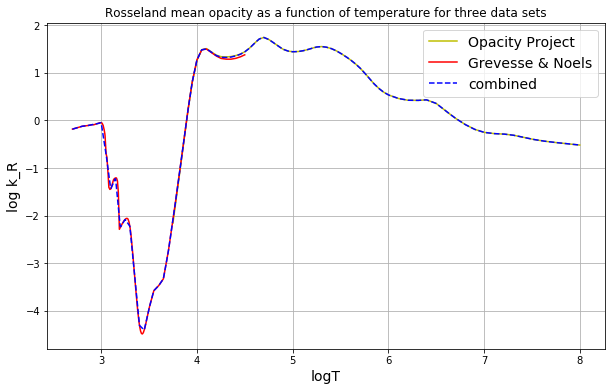

In [21]:
# Plot of log T vs log kappa

logR_plot = -3
logT_plot_GN = np.linspace(np.min(logT_GN), np.max(logT_GN), 1000)
opacity_plot_002_GN = f_702_GN(logR_plot, logT_plot_GN)

logT_plot_new = np.linspace(np.min(logT_new), np.max(logT_new), 1000)
opacity_plot_new = f_opacity(logR_plot, logT_plot_new)

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('logT', fontsize="14")
fr.set_ylabel('log k_R', fontsize="14")
fr.grid(True)
fr.plot(logT_plot, opacity_plot_002,"y-", label = "Opacity Project")
fr.plot(logT_plot_GN, opacity_plot_002_GN,"r-", label = "Grevesse & Noels")
fr.plot(logT_plot_new, opacity_plot_new, "b--", label = "combined")
fr.legend(fontsize="14")
fr.set_title("Rosseland mean opacity as a function of temperature for three data sets")
#ylim(bottom=-1)
show()

## Part 2

### Derivation of T as a function of optical depth
  
The first approximation is that the opacity is independent of the frequency, this implies a grey atmosphere. The temperature profile for a grey atmosophere is given by the following equation:  
$T(\tau) = T_{eff}\left[ \frac{3}{4}(\tau + q(\tau))\right]$  
Where $q(\tau)$ is the Hopf function. When it is assumed that most radiation emanated by the Sun comes from the layers of the Sun where photons have a 50% of reaching the surface ($e^{-\tau}=0.5$). Consequently $\tau =2/3$, then using the boandary condition  $T(\tau=2/3)= T_{eff}$, it can be found that $q(\tau) = 2/3$.
Hence the temperature profile that can be adopted in this regime (surface layers, $0.05 \leq \tau \ \leq 2.0$) is:  
$T(\tau) = T_{eff}\left[ \frac{3}{4}(\tau + \frac{2}{3})\right]$  


### Discuss opacity approximation (independent of frequency and given by the Rosseland mean opacity.)
 
The grey atmosphere is an approximation of the stellar atmosphere that assumes that the opacity is independent of frequency (and wavelength). This model is not very accurate but does allow for basic properties and the temperature of a star (in this case the Sun) to be determined analytically. The temperature profile that is given above is only valid for the exterior regions/ outer layers of the Sun.
  
The assumption of the Rosseland mean opacity in combinatation with the grey atmosphere implies that the average opacity is equal to the opacity (= Rosseland mean opacity). 




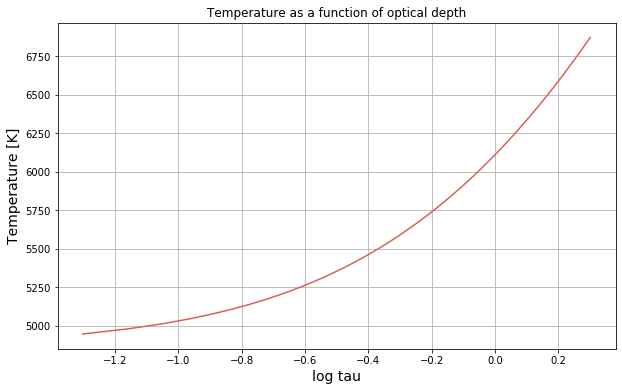

In [22]:
# Plot of T as a function of optical depth for region of interest - think about what you can show as a verification

def Temp(tau):
    Teff = 5777 #K, Teff of Sun
    return Teff*(3/4*(tau + 2/3))**0.25 


tau_plot = np.linspace(0.05, 2.0, 100)

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('log tau', fontsize="14")
fr.set_ylabel('Temperature [K]', fontsize="14")
fr.grid(True)
fr.plot(np.log10(tau_plot), Temp(tau_plot),"-")
fr.set_title("Temperature as a function of optical depth")
#xscale('log')
#fr.legend(fontsize="14")
#ylim(bottom=-1)
show()


### Derivation of the equation of hydrostatic equilibrium
Hydrostatic equilibrium:  
$\frac{dP(r)}{dr}=-\rho(r)g$  

Using the definition of the optical depth: $d\tau = -k\rho dz$
Using the notation of that assignment, the opacity is given by $\kappa$ and dz becomes dr. Consequenlty $d\tau = -\kappa\rho dr$
This equation can be rewritten to find:  
$-\rho = \frac{1}{\kappa}\frac{d\tau}{dr}$  

Next this equation can be subsituted in the expression for the hydrostatic equilibrium:  
$\frac{dP(r)}{dr}=\frac{g}{\kappa}\frac{d\tau}{dr}$ 

$\frac{dP(r)}{dr}\frac{dr}{d\tau}=\frac{g}{\kappa}$ 

$\frac{dP}{d\tau}=\frac{g}{\kappa}$  

Using the expression of $\log\kappa$ that is given, an expression for the pressure can be found:  
$\log \kappa = -4.40 + 0.8 \log P_g$  
$\kappa = 10^{-4.40}\cdot P_g^{0.8}$  
Substituting this expression in the derived equation of the hydrostatic equilibrium:  
$\frac{dP}{d\tau}=\frac{g}{10^{-4.40}\cdot P_g^{0.8}}$  
$\int P_g^{0.8} dP = 10^{4.40} g\int d\tau $  
$\frac{1}{1.8} P_g^{1.8}  10^{4.40} g\tau$

$P_g(\tau) = \left(1.8g\tau \cdot10^{4.4} \right)^{5/9}$


### Starting value for pressure

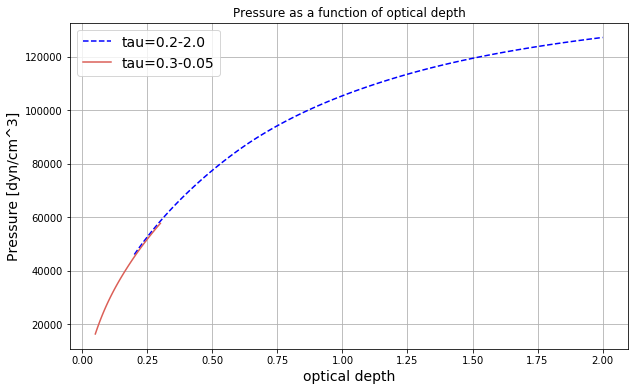

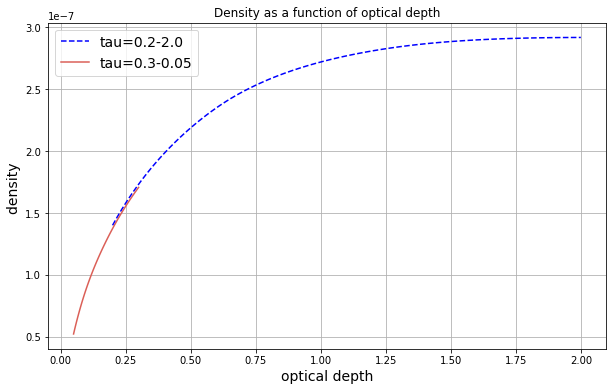

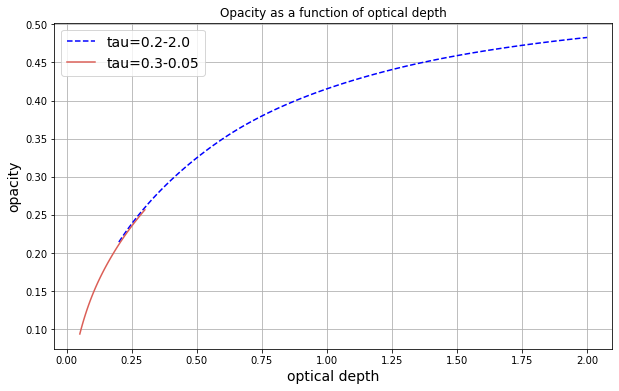

In [49]:
# Integration for starting pressure values

#calculating solar gravitational accelaration
G = 6.67259e-8  # cm^3 g^-1 s^-2
Msol = 1.9891e33  # g
Rsol = 6.95508e10  # cm
g = G*Msol/(Rsol**2)

def Pressure(tau):
    """ Calculate gravitational pressure as a function of optical depth"""
    p = 1.8*g*tau*10**(4.4)
    return p**(5/9)

#starting pressure values
P_02 = Pressure(0.2)
P_03 = Pressure(0.3)

#equation 1 from assignment, over which to integrate
def dPdtau(tau, P):
    logT = np.log10(Temp(tau))
    logP = np.log10(Pressure(tau))
    k = 10**Log_opacity(logP, logT)
    return g/k

tau_02 = np.linspace(0.2,2,100)
tau_03 = np.linspace(0.3,0.05,100)

Solve_02 = solve_ivp(dPdtau, t_span=[0.2, 2.0], y0=[P_02], dense_output=True) #come up with better names
Pprofile_02 = Solve_02.sol(tau_02)[0]

Solve_03 = solve_ivp(dPdtau, t_span=[0.3,0.05], y0=[P_03], dense_output=True) #come up with better names
Pprofile_03 = Solve_03.sol(tau_03)[0]

# Plot of pressure as a function of optical depth.
fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('optical depth', fontsize="14")
fr.set_ylabel('Pressure [dyn/cm^3]', fontsize="14")
fr.grid(True)
fr.plot(tau_02, Pprofile_02, "b--", label='tau=0.2-2.0')
fr.plot(tau_03, Pprofile_03, "-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Pressure as a function of optical depth")
show()

# Plot of density as a function of optical depth
T = 5777 #Teff sun [K]
k = 1.380658e-16  #erg/K Boltzmann constant
mu = 1.3 #average mass in m_H
mH = 1.6735344e-24   #g, mass of 1H atom 
def rho(P,tau):
    T=Temp(tau)
    return P*mu*mH/(k*T)

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('optical depth', fontsize="14")
fr.set_ylabel('density ', fontsize="14")
fr.grid(True)
fr.plot(tau_02, rho(Pprofile_02,tau_02), "b--", label='tau=0.2-2.0')
fr.plot(tau_03, rho(Pprofile_03,tau_03), "-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Density as a function of optical depth")
show()

# Plot of opacity as a function of optical depth
def kappa(P):
    k = 10**(-4.4)*P**0.8
    return k

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('optical depth', fontsize="14")
fr.set_ylabel('opacity', fontsize="14")
fr.grid(True)
fr.plot(tau_02, kappa(Pprofile_02), "b--", label='tau=0.2-2.0')
fr.plot(tau_03, kappa(Pprofile_03), "-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Opacity as a function of optical depth")
show()

### Relation between the optical depth and the geometrical depth

$d\tau = -\kappa\rho dz$  
$\frac{dz}{dP} = \frac{dz}{d\tau}\frac{d\tau}{dP}$

The first equation can be rewritten to find: $\frac{dz}{d\tau} = -\frac{1}{\kappa\rho}$.  
The hydrostatic equilibrium gives $\frac{d\tau}{dP} = \frac{\kappa}{g}$

Hence $\frac{dz}{dP}$ is found to be: $\frac{dz}{dP} =-\frac{1}{\kappa\rho}\frac{\kappa}{g}  = - \frac{1}{\rho g}$

Except we want to define z as zero at the surface and increasing towards the centre, hence the sign of the expression above changes from - to +.


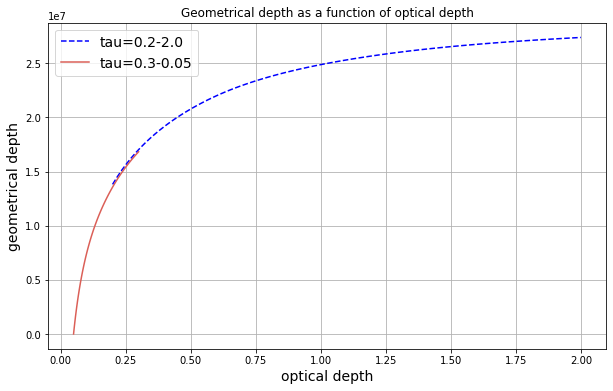

In [24]:
# Integration of equation
T = 5777 #Teff sun [K]
k = 1.380658e-16  #erg/K Boltzmann constant
mu = 1.3 #average mass in m_H
mH = 1.6735344e-24   #g, mass of 1H atom 

tau_01 = np.linspace(0.05,2,1000)

def rho2(P):
    return P*mu*mH/(k*T)

def dzdP(P, z):
    return 1/(rho2(P)*g)

init=np.max(Pprofile_02)
final=np.min(Pprofile_03)

Solve_01 = solve_ivp(dzdP, t_span=[final,init], y0=[0], dense_output=True)
z_011 = Solve_01.sol(Pprofile_02)[0]
z_012 = Solve_01.sol(Pprofile_03)[0]

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('optical depth', fontsize="14")
fr.set_ylabel('geometrical depth', fontsize="14")
fr.grid(True)
fr.plot(tau_02, z_011, "b--", label='tau=0.2-2.0')
fr.plot(tau_03, z_012, "-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Geometrical depth as a function of optical depth")
show()


## Part 3

### Loading in MARCS data

The table **MARCS_solar_model.dat** from Nestor is already loaded for you.

In [25]:
# Extract values from MARCS table
MARCS_k, MARCS_logTau, MARCS_z, MARCS_Temp, MARCS_P_e, MARCS_P_g, MARCS_P_rad, MARCS_P_turb = np.loadtxt('MARCS_solar_model.dat').T


### Plots

Plot your model and the MARCS data on same axes, discuss each plot

### Plot of log tau vs T(tau)

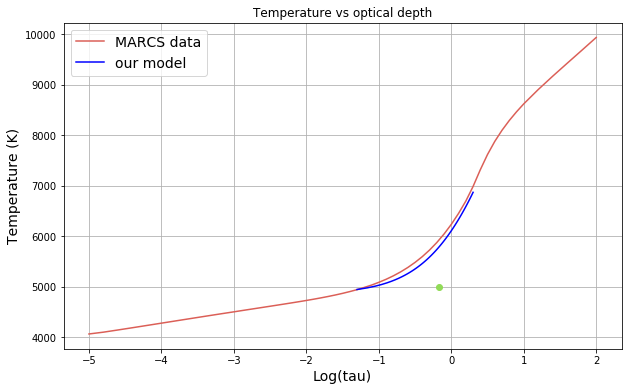

In [43]:
# Plot
fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('Log(tau)', fontsize="14")
fr.set_ylabel('Temperature (K)', fontsize="14")
fr.grid(True)
fr.plot(MARCS_logTau, MARCS_Temp, "-", label='MARCS data')
fr.plot(np.log10(tau_plot), Temp(tau_plot),"b-", label='our model')
fr.plot(np.log10(2/3), 5000, "o")
fr.legend(fontsize='14')
fr.set_title("Temperature vs optical depth")
show()

Discussion of plot:  
The plots show that the temperature increases as the optical depth increases. Optical depth is a measure of opaqueness of the stellar medium and increases deeper within the star. This is also the case for temperature. Generally the deeper within the star, the hotter. Our model fits the MARCS data pretty well. It matches near the end and beginning of our model, but deviates in the center. The assumptions for our temperature profile were that of a grey atmosphere and that $T(\tau=2/3)=T_{eff}$. This approximates that the opacity is independent of frequency. It deviates most around values where most of the radiation comes from. 
### Plot of log tau vs P(tau)

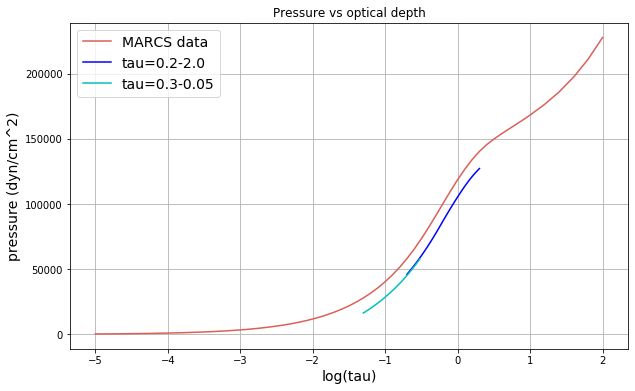

In [44]:
# Plot
MARCS_P = MARCS_P_e + MARCS_P_g + MARCS_P_rad +MARCS_P_turb # is this correct?
fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('log(tau)', fontsize="14")
fr.set_ylabel('pressure (dyn/cm^2)', fontsize="14")
fr.grid(True)
fr.plot(MARCS_logTau, MARCS_P, "-", label='MARCS data')
fr.plot(np.log10(tau_02), Pprofile_02, "b-", label='tau=0.2-2.0')
fr.plot(np.log10(tau_03), Pprofile_03, "c-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Pressure vs optical depth")
show()

Discussion of plot:  
The above plot shows an increasing relation between pressure and optical depth. Pressure increases closer to the star, just as optical depth. The pressure profile of our model fits the MARCS model quite well, they seem to be proportional. An assumption that was made that could cause the deviation, that is the same everywhere, is the assumption that $P(\tau = 0)=0$. The optical depth is zero at the surface (as can be seen in the plot of geometrical depth vs optical depth), but the pressure is in reallity not zero there. This difference could be the reason for this offset. 

### Plot of log tau vs rho(tau)

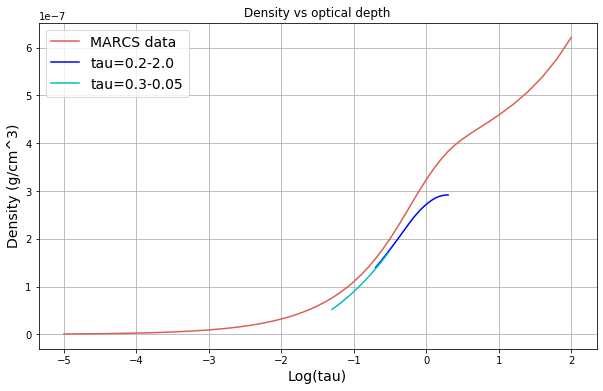

In [46]:
# Plot
MARCS_dens = rho2(MARCS_P)
fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('Log(tau)', fontsize="14")
fr.set_ylabel('Density (g/cm^3)', fontsize="14")
fr.grid(True)
fr.plot(MARCS_logTau, MARCS_dens, "-", label='MARCS data')
fr.plot(np.log10(tau_02), rho(Pprofile_02,tau_02), "b-", label='tau=0.2-2.0')
fr.plot(np.log10(tau_03), rho(Pprofile_03,tau_03), "c-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Density vs optical depth")
show()

Discussion of plot:  
The density of the MARCS data was determined differently than that of our model. For our model the effective temperature was used with the approximation of a grey atmosphere, while for the MARCS model a $T_{eff}$ of 5777 K was taken, the literature value of the Sun's effective temperature and the ideal gas law. 


### Plot of log tau vs kappa(tau)

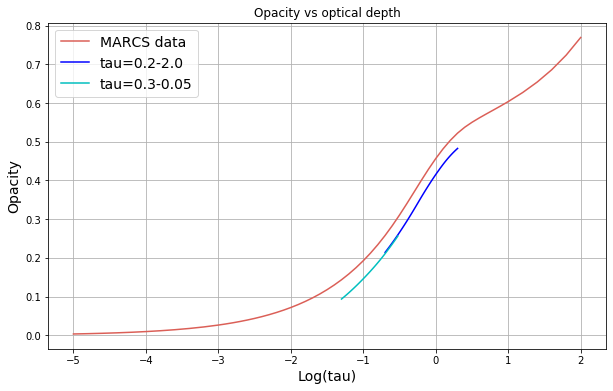

In [50]:
# Plot
MARCS_kappa = kappa(MARCS_P)
fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('Log(tau)', fontsize="14")
fr.set_ylabel('Opacity', fontsize="14")
fr.grid(True)
fr.plot(MARCS_logTau, MARCS_kappa, "-", label='MARCS data')
fr.plot(np.log10(tau_02), kappa(Pprofile_02), "b-", label='tau=0.2-2.0')
fr.plot(np.log10(tau_03), kappa(Pprofile_03), "c-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Opacity vs optical depth")
show()

Discussion of plot:  
Opacity is the capacity of matter to absorb electromagnetic radiation. This also increases with optical depth as both have as a consequence that less radiation goes through the matter. Our model relativly closely matches the MARCS data, with a slight offset that is a larger at smaller optical depths. Our optical depth was determined with $\kappa = 10^{-4.40}\cdot P_g^{0.8}$. This only works for $4\leq log(P) \leq 5$, $10000\leq P \leq 100000$. This is approximately above $log(\tau)=0$, so below this value the approximation becomes less valid and can be the reason as to why the offset increases.  


### Plot of log tau vs z(tau)

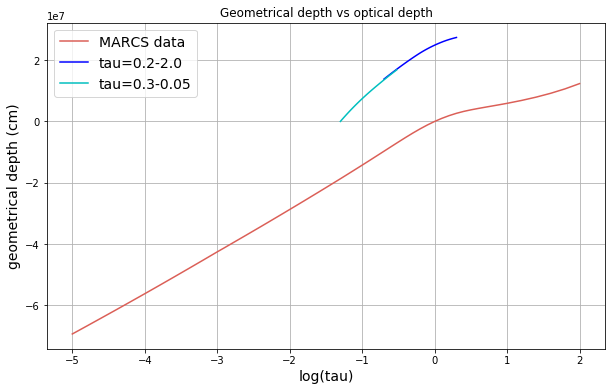

In [30]:
# Plot

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('log(tau)', fontsize="14")
fr.set_ylabel('geometrical depth (cm)', fontsize="14")
fr.grid(True)
fr.plot(MARCS_logTau, MARCS_z, "-", label='MARCS data')
fr.plot(np.log10(tau_02), z_011, "b-", label='tau=0.2-2.0')
fr.plot(np.log10(tau_03), z_012, "c-", label='tau=0.3-0.05')
#fr.plot([np.log10(0.666)], [2.3e7], "o", label='tau=0.2-2.0') #tau=2/3, most radiation from this depth
fr.legend(fontsize='14')
fr.set_title("Geometrical depth vs optical depth")
show()

Discussion of plot:  
Our model is quite off from the MARCS data. They are both increasing with optical depth, as this depends on how one defines it. To make a function of geometrical depth we used the assumption that $z(\tau = 0.05)=0$, whhich could be one of the reasons for the large offset.  
The most of the radiation at the surface is coming a geometrical depth where tau=2/3. This gives log(2/3)=-0.176. In the plot this is at approximately z=2.3e7. Below we also calculated this value, giving a depth of z=2.26e7.

In [41]:
P066 = Solve_02.sol(2/3)[0] #pressure calculation for tau=2/3
z_066 = Solve_01.sol(P066)  #geometrical depth for P(tau=2/3)
print(f'Most radiation at the surface from z={z_066[0]} cm')

Most radiation at the surface from z=22677159.93182908 cm


## Part 4

Implement Saha equation to get ionisation fractions for H, He. Remember to discuss your plots, do they make sense?
  
$\frac{n_{i+1}}{n_i}=\frac{1}{n_e}\left(\frac{2\pi m_ekT}{h^2}\right)^{3/2}\frac{2U_{i+1}}{U_i}e^{-\frac{E_{ion}}{kT}}$  
The number density of electrons $n_e$ can be determined using the ideal equation of state:  
$n_e = \frac{P_e}{kT}$  
Where $P_e$ is the pressure due to electrons.  
The partition functions $U$ can be determined with: $U_{ion} = \sum_{n=1}^{\infty}g_n e^{-\frac{E_n}{kT}}$  
Here we will assume the following values for $U$:  
$U_{HI} =1$, $U_{HII} = 1$, $U_{HeI} =1$, $U_{HeII} = 2$, $U_{HeIII} = 1$  
  
Using the fractions that were calculated with the Saha equations the ionisation fractions $f_i$ can be calculated.  
$f_{HI} = \frac{1}{1+\left ( {n_{HI}}/{n_{HII}} \right )}$  
$f_{HII} = \frac{\left ( {n_{HI}}/{n_{HII}} \right )}{1+\left ( {n_{HI}}/{n_{HII}} \right )}$  
$f_{HeI} = \frac{1}{1+ (n_{HeII}/n_{HeI}) + (n_{HeIII}/n_{HeII})(n_{HeII}/n_{HeI})}$  
$f_{HeII} = \frac{n_{HeII}/n_{HeI}}{1+ (n_{HeII}/n_{HeI}) + (n_{HeIII}/n_{HeII})(n_{HeII}/n_{HeI})}$  
$f_{HeIII} = \frac{(n_{HeIII}/n_{HeII})(n_{HeII}/n_{HeI})}{1+ (n_{HeII}/n_{HeI}) + (n_{HeIII}/n_{HeII})(n_{HeII}/n_{HeI})}$  



In [32]:
# Saha function
m_e = 9.11e-28  #g, mass electron
h  = 6.6260755e-27  #erg s, planck constant
k = 1.380658e-16  #erg/K

eV_erg = 1.60218e-12  #erg
E_HI = 13.6*eV_erg
E_HeI = 24.6*eV_erg
E_HeII = 54.4*eV_erg


In [33]:
# Plot of hydrogen ionization fraction as function of log tau

# plot of axes are important

# Plot of the ionisation fraction of helium as a function of log tau

## Part 5

### What would be the next step to create a model of an observed stellar spectrum?

## References 

Pick a style and stick to it. Make sure to also cite them in the report where you use them.

In [ ]:
All assumptions:   (rosseland mean opacity, ideal gas, grey atmosphere, 50% of opacity from tau=2/3, P(τ = 0) = 0, Teff we have τ = 2/3, τ = 0.2 and τ = 0.3 as starting values, mean molecular weight = 1.30, z(τ = 0.05) = 0)
